<a href="https://colab.research.google.com/github/kinshukss/CodingPrepo/blob/main/CNN_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#datasets.cifar10.load_data()

In [72]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [73]:
X_train.shape

(50000, 32, 32, 3)

In [74]:
X_test.shape

(10000, 32, 32, 3)

In [75]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [76]:
y_train = y_train.reshape(-1)

In [77]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [78]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [79]:
def plot_sample(X,y,index):
  plt.figure(figsize=(10,6))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

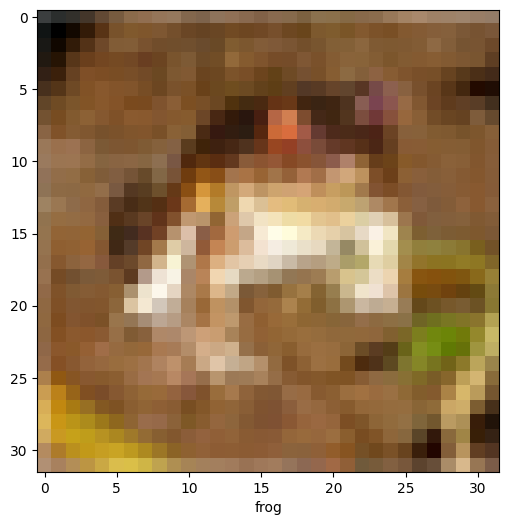

In [80]:
plot_sample(X_train,y_train,0)


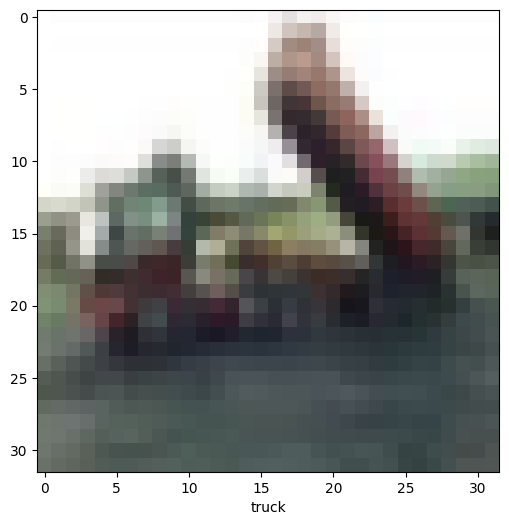

In [81]:
plot_sample(X_train,y_train,2)

In [82]:
X_train=X_train/255
X_test=X_test/255

In [83]:
#X_train

In [84]:
cnn=models.Sequential([
 #CNN
   layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
  layers.MaxPooling2D((2,2)),
#DENSE
     layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [85]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [86]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 39ms/step - loss: 1.4882 - accuracy: 0.4622
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1219 - accuracy: 0.6035
Epoch 3/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9800 - accuracy: 0.6576
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8933 - accuracy: 0.6881
Epoch 5/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8266 - accuracy: 0.7128
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7722 - accuracy: 0.7308
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7283 - accuracy: 0.7446
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6825 - accuracy: 0.7639
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6451 - accuracy: 0.7740
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [87]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9325 - accuracy: 0.6941


[0.9324612021446228, 0.694100022315979]

In [88]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_predict=cnn.predict(X_test)
y_predict_classes=[np.argmax(element) for element in y_predict]
print(classification_report(y_test,y_predict_classes))

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.86      0.77      0.81      1000
           2       0.58      0.63      0.61      1000
           3       0.52      0.46      0.49      1000
           4       0.68      0.57      0.62      1000
           5       0.52      0.71      0.60      1000
           6       0.83      0.69      0.75      1000
           7       0.71      0.78      0.74      1000
           8       0.75      0.84      0.80      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



In [89]:
y_predict=cnn.predict(X_test)
y_predict[:5]

313/313 [==============================] - 4s 11ms/step


array([[2.4012147e-04, 4.1241469e-04, 2.0829560e-03, 8.4040701e-01,
        3.7740706e-04, 1.5449190e-01, 8.6508261e-04, 1.2534704e-04,
        4.1335556e-04, 5.8440986e-04],
       [8.1405034e-03, 1.6779649e-01, 3.3079658e-07, 1.6631103e-07,
        2.7834115e-09, 4.7975013e-10, 6.4146466e-11, 9.1618391e-10,
        8.2380879e-01, 2.5367158e-04],
       [1.3125022e-01, 1.8952301e-01, 2.5322777e-04, 1.4722542e-03,
        2.2683111e-04, 4.2418207e-04, 8.6171771e-05, 8.5589709e-03,
        6.2718815e-01, 4.1016955e-02],
       [9.9268115e-01, 3.7923415e-05, 1.5385192e-03, 7.4982534e-05,
        9.3485537e-04, 1.4437460e-06, 4.0926834e-06, 7.2690884e-05,
        4.6356684e-03, 1.8499557e-05],
       [2.1368203e-07, 5.1898003e-04, 1.8664119e-03, 4.3676205e-02,
        1.0114960e-01, 1.2535159e-02, 8.4009695e-01, 2.4507447e-06,
        8.9064590e-05, 6.4906882e-05]], dtype=float32)

In [90]:
y_classes=[np.argmax(element) for element in y_predict]
y_classes[:5]

[3, 8, 8, 0, 6]

In [91]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [92]:
y_test=y_test.reshape(-1)

In [97]:
classes[y_classes[99]]

'horse'

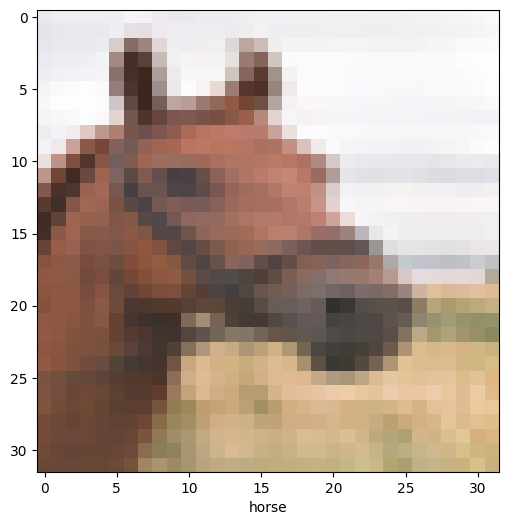

In [98]:
plot_sample(X_test,y_test,99)